In [1]:
import matplotlib.pyplot as plt

import psignifit as ps
import psignifit.psigniplot as psp
import csv
import pandas as pd
import numpy as np

# Importing and visualising the data

In [2]:
filename = "Pulfrich_testcontrol_20260122_145201.csv"
fields = ["distance_m", "response"]
rows = []

df = pd.read_csv(filename, names = fields, header=0, usecols=[1,2])

aggregated_data = df.groupby(['distance_m']).agg(
    n_correct = ('response', lambda x: (x == 'BEHIND').sum()),
    n_total = ('distance_m', 'count')
)

# where n_correct is the number of BEFORE responses
data = aggregated_data.reset_index()

In [3]:
df.head()

,distance_m,response
0,-8.0,BEFORE
1,6.0,BEHIND
2,-2.0,BEHIND
3,8.0,BEHIND
4,4.0,BEHIND


In [4]:
aggregated_data.head()

,n_correct,n_total
distance_m,,
-10.0,0,2
-8.0,0,2
-6.0,0,2
-5.0,1,2
-4.0,0,2


/home/lua/Documents/Uni/VR/.venv/lib/python3.12/site-packages/psignifit/psignifit.py:161: UserWarning: All provided data blocks contain <= 5 trials.
            Did you sample adaptively?
            If so please specify a range which contains the whole psychometric function in
            conf.stimulus_range.
            An appropriate prior prior will be then chosen. For now we use the standard
            heuristic, assuming that the psychometric function is covered by the stimulus
            levels, which is frequently invalid for adaptive procedures!
  warnings.warn("""All provided data blocks contain <= 5 trials.


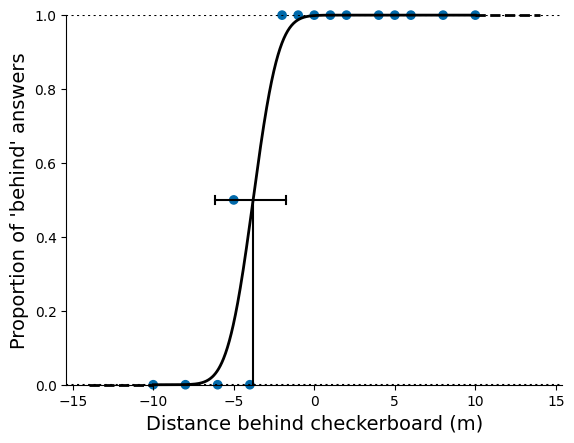

In [5]:
result = ps.psignifit(data, experiment_type='yes/no')

plt.figure()
psp.plot_psychometric_function(result, x_label = "Distance behind checkerboard (m)", y_label = "Proportion of 'behind' answers")
plt.show()